In [1]:
#Import Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
from scipy.stats import linregress
import time
from datetime import datetime

In [2]:
#import raw data csv

input_data_file = "C:/Bootcamp/Homework_Repos/ProjectOne-MentalHealthinTech/RAW DATA/SURVEY RAW DATA 2_CSV.CSV"

# Read in file and store in Pandas data frame
survey_data_df = pd.read_csv(input_data_file)
survey_data_df 

 


# ideal_cities_df = weather_df.loc[(weather_df["Max Temp"] > 70) & (weather_df["Max Temp"] < 80) & (weather_df["Cloudiness"] == 0) & (weather_df["Wind Speed"] <10), :]


,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,8_ANONIMITY_PROTECT,9_COMFORT_DISCUSS_SUPERVISOR,...,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
0,2017,0,100-500,1,No,Yes,No,I don't know,I don't know,Yes,...,NaN,Sometimes,Sometimes,1.0,27.0,Female,United Kingdom,NaN,NaN,United Kingdom
1,2017,0,100-500,1,Yes,Yes,No,No,I don't know,Maybe,...,NaN,Not applicable to me,Sometimes,2.0,31.0,male,United Kingdom,NaN,NaN,United Kingdom
2,2017,0,25-Jun,1,I don't know,No,I don't know,No,Yes,Yes,...,Yes,Sometimes,Sometimes,1.0,36.0,male,United States of America,Missouri,White,United States of America
3,2017,0,More than 1000,1,Yes,Yes,I don't know,I don't know,Yes,Yes,...,Yes,Sometimes,Often,2.0,22.0,Male,United States of America,Washington,White,United States of America
4,2017,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Often,Sometimes,1.0,52.0,female,United States of America,Illinois,More than one of the above,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2020,0,More than 1000,0,No,No,No,No,No,No,...,NaN,Sometimes,Often,2.0,53.0,Male,United States of America,New York,Asian,United States of America
1701,2020,0,26-100,1,Yes,Yes,Yes,Yes,I don't know,Maybe,...,NaN,Often,Often,3.0,23.0,F,Philippines,NaN,NaN,Philippines
1702,2020,0,100-500,1,I don't know,No,No,I don't know,I don't know,Maybe,...,Yes,Sometimes,Often,3.0,34.0,Male,United States of America,Tennessee,White,United States of America
1703,2020,0,500-1000,0,Yes,No,Yes,Yes,Yes,No,...,NaN,Rarely,Sometimes,3.0,43.0,Male,Canada,NaN,NaN,Canada


In [3]:
survey_data_df['3_TECH_ORG'].replace('TRUE',"1", inplace=True)
survey_data_df['3_TECH_ORG'].replace('FALSE',"0", inplace=True)

survey_data_df

,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,8_ANONIMITY_PROTECT,9_COMFORT_DISCUSS_SUPERVISOR,...,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
0,2017,0,100-500,1,No,Yes,No,I don't know,I don't know,Yes,...,NaN,Sometimes,Sometimes,1.0,27.0,Female,United Kingdom,NaN,NaN,United Kingdom
1,2017,0,100-500,1,Yes,Yes,No,No,I don't know,Maybe,...,NaN,Not applicable to me,Sometimes,2.0,31.0,male,United Kingdom,NaN,NaN,United Kingdom
2,2017,0,25-Jun,1,I don't know,No,I don't know,No,Yes,Yes,...,Yes,Sometimes,Sometimes,1.0,36.0,male,United States of America,Missouri,White,United States of America
3,2017,0,More than 1000,1,Yes,Yes,I don't know,I don't know,Yes,Yes,...,Yes,Sometimes,Often,2.0,22.0,Male,United States of America,Washington,White,United States of America
4,2017,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Often,Sometimes,1.0,52.0,female,United States of America,Illinois,More than one of the above,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2020,0,More than 1000,0,No,No,No,No,No,No,...,NaN,Sometimes,Often,2.0,53.0,Male,United States of America,New York,Asian,United States of America
1701,2020,0,26-100,1,Yes,Yes,Yes,Yes,I don't know,Maybe,...,NaN,Often,Often,3.0,23.0,F,Philippines,NaN,NaN,Philippines
1702,2020,0,100-500,1,I don't know,No,No,I don't know,I don't know,Maybe,...,Yes,Sometimes,Often,3.0,34.0,Male,United States of America,Tennessee,White,United States of America
1703,2020,0,500-1000,0,Yes,No,Yes,Yes,Yes,No,...,NaN,Rarely,Sometimes,3.0,43.0,Male,Canada,NaN,NaN,Canada


In [4]:
print(survey_data_df.loc[[1387]])

      YEAR 1_SELF_EMPLOY 2_NUM_OF_EMPLOYEES 3_TECH_ORG 4_MH_BEN_PROVIDED  \
1387  2019         FALSE             26-100          1      I don't know   

     5_AWARE_OF_MH_BENEFITS 6_EMPLOY_FORMALLY_DISCUSS_MH  \
1387                    NaN                          Yes   

     7_EMPLOY_OFFER_RESOURCES 8_ANONIMITY_PROTECT  \
1387                       No        I don't know   

     9_COMFORT_DISCUSS_SUPERVISOR  ... 16_DIAGNOSED_MH_DISORDER  \
1387                        Maybe  ...                      NaN   

      17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED  \
1387                          Not applicable to me   

      18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED  \
1387                              Not applicable to me   

     19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER 20_AGE 21_GENDER 22_COUNTRY  \
1387                                    3.0   33.0      male     Canada   

     23_STATE 24_RACE  25_COUNTRY_2  
1387      NaN     NaN        Canada  

[1 rows x 26 columns]


In [5]:
survey_data_df["3_TECH_ORG"].value_counts()

1    1071
0     392
Name: 3_TECH_ORG, dtype: int64

In [6]:
#Of responses from the Survey 864 out of 1705 particpants in the last 4 years were for employers in the tech industry
# Filter out survey responses for individuals that were not employees of tech organizations (Survey question 3)
#tech_mental_health will be the data frame that we use for ongoing anaylis.

tech_mental_health = survey_data_df.loc[survey_data_df["3_TECH_ORG"]=="1"]
tech_mental_health

,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,8_ANONIMITY_PROTECT,9_COMFORT_DISCUSS_SUPERVISOR,...,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
0,2017,0,100-500,1,No,Yes,No,I don't know,I don't know,Yes,...,NaN,Sometimes,Sometimes,1.0,27.0,Female,United Kingdom,NaN,NaN,United Kingdom
1,2017,0,100-500,1,Yes,Yes,No,No,I don't know,Maybe,...,NaN,Not applicable to me,Sometimes,2.0,31.0,male,United Kingdom,NaN,NaN,United Kingdom
2,2017,0,25-Jun,1,I don't know,No,I don't know,No,Yes,Yes,...,Yes,Sometimes,Sometimes,1.0,36.0,male,United States of America,Missouri,White,United States of America
3,2017,0,More than 1000,1,Yes,Yes,I don't know,I don't know,Yes,Yes,...,Yes,Sometimes,Often,2.0,22.0,Male,United States of America,Washington,White,United States of America
5,2017,0,100-500,1,Yes,No,No,I don't know,Yes,Maybe,...,NaN,Rarely,Not applicable to me,2.0,30.0,male,United States of America,California,White,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,2020,0,26-100,1,Yes,Yes,Yes,Yes,No,No,...,Yes,Sometimes,Often,2.0,40.0,Female,United Kingdom,NaN,NaN,United Kingdom
1699,2020,0,More than 1000,1,I don't know,No,I don't know,I don't know,I don't know,No,...,NaN,Often,Often,2.0,31.0,male,India,NaN,NaN,India
1701,2020,0,26-100,1,Yes,Yes,Yes,Yes,I don't know,Maybe,...,NaN,Often,Often,3.0,23.0,F,Philippines,NaN,NaN,Philippines
1702,2020,0,100-500,1,I don't know,No,No,I don't know,I don't know,Maybe,...,Yes,Sometimes,Often,3.0,34.0,Male,United States of America,Tennessee,White,United States of America


In [7]:
#1..#Analysis of Question 4 - How many employers provide mental health benefits
#What was the breakdown of answers for this quesion of the 864 parcticipants that work in tech
#Used to see if responses that were similar in sentiment but wrere free text by participants
mental_health_benefits_responses= tech_mental_health["4_MH_BEN_PROVIDED"].value_counts()
mental_health_benefits_responses

Yes                               586
I don't know                      284
No                                152
Not eligible for coverage / NA     49
Name: 4_MH_BEN_PROVIDED, dtype: int64

In [8]:
#1. Analysis of Question 4 - How many employers provide mental health benefits across all 4 years
#How many employees answered this question - 1463
employers_who_do_provide_mental_health_benefits= tech_mental_health.loc[tech_mental_health["4_MH_BEN_PROVIDED"]=="Yes"]
employers_who_do_provide_mental_health_benefits


,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,8_ANONIMITY_PROTECT,9_COMFORT_DISCUSS_SUPERVISOR,...,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
1,2017,0,100-500,1,Yes,Yes,No,No,I don't know,Maybe,...,NaN,Not applicable to me,Sometimes,2.0,31.0,male,United Kingdom,NaN,NaN,United Kingdom
3,2017,0,More than 1000,1,Yes,Yes,I don't know,I don't know,Yes,Yes,...,Yes,Sometimes,Often,2.0,22.0,Male,United States of America,Washington,White,United States of America
5,2017,0,100-500,1,Yes,No,No,I don't know,Yes,Maybe,...,NaN,Rarely,Not applicable to me,2.0,30.0,male,United States of America,California,White,United States of America
6,2017,0,44372,1,Yes,Yes,No,No,Yes,Yes,...,Yes,Rarely,Often,2.0,36.0,F,United States of America,Washington,Asian,United States of America
7,2017,0,26-100,1,Yes,No,No,No,I don't know,Yes,...,NaN,Not applicable to me,Not applicable to me,2.0,38.0,Female,United States of America,Georgia,White,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,2020,0,More than 1000,1,Yes,No,No,I don't know,I don't know,No,...,NaN,Not applicable to me,Not applicable to me,2.0,21.0,Male,Ireland,NaN,NaN,Ireland
1693,2020,0,26-100,1,Yes,No,Yes,Yes,I don't know,Yes,...,Yes,Often,Often,2.0,39.0,Male,United States of America,Colorado,White,United States of America
1696,2020,0,More than 1000,1,Yes,Yes,Yes,Yes,Yes,Maybe,...,NaN,Not applicable to me,Not applicable to me,2.0,39.0,Male,United States of America,Massachusetts,White,United States of America
1698,2020,0,26-100,1,Yes,Yes,Yes,Yes,No,No,...,Yes,Sometimes,Often,2.0,40.0,Female,United Kingdom,NaN,NaN,United Kingdom


<AxesSubplot:title={'center':'Employers Who Provide Mental Health Benefits'}>

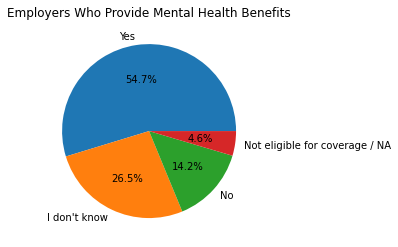

In [9]:
# 1.Analysis of Question 4 - How many employers provide mental health benefits
#What was the breakdown of answers for this quesion of the 1463 that did answer aross all 4 years

employers_who_provide_mental_health_benefits= tech_mental_health["4_MH_BEN_PROVIDED"].value_counts()
employers_who_provide_mental_health_benefits.plot(kind ="pie", ylabel = "", title ="Employers Who Provide Mental Health Benefits",autopct="%1.1f%%") 


In [ ]:
#1. Analysis of Question 4 - How many employers provide mental health benefits *yearly* breakdown
#come back to how to create yearly data frame when we cant use groupby
#internal note--need to figure out how to group by year without using arithmentic
yearly_employers_who_provide_mental_health_benefits = tech_mental_health_dgroupby(["YEAR","4_MH_BEN_PROVIDED"]).count()
yearly_employers_who_provide_mental_health_benefits

In [ ]:
#2.Level of comfort people have discussing mental health with employers vs how many people have actually discussed mental health with employers? 
# Main - Stacked bar chart level of comfort disucssing each year
# Main - Stacked bar chart actually disuccsing each year
# TBD if we see higher number of yeses in comfort are high, lets see if we can plot regression of number of yes in comfort vs number of yes in discussion
#stacked bar chart  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

#Level of comfort people have discussing mental health with employers across each year (Question 9) - Stacked Bar Chart

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

# #Bar and Pie Charts using Pandas
​
count_drug_regimen = unique_mice_df["Drug Regimen"].value_counts()
count_drug_regimen_df =count_drug_regimen
count_drug_regimen_df.plot(kind = "bar", title = "Total Measurements per Drug Regimen", xlabel="Drug Regimen", ylabel= "Total Measurements of Drug Regimen")




#Formatting for stacked bar chart
# speed = [0.1, 17.5, 40, 48, 52, 69, 88]
# lifespan = [2, 8, 70, 1.5, 25, 12, 28]
# index = ['snail', 'pig', 'elephant',
#          'rabbit', 'giraffe', 'coyote', 'horse']
# df = pd.DataFrame({'speed': speed,
#                    'lifespan': lifespan}, index=index)
# ax = df.plot.bar(rot=0) 

# ax = df.plot.bar(stacked=True)


In [ ]:
#2.Level of comfort people have discussing mental health with employers vs how many people have actually discussed mental health with employers? 
#Level of comfort people have discussing mental health with employers across each year (Question 10) - Stacked Bar Chart

In [ ]:
#2.Level of comfort people have discussing mental health with employers vs how many people have actually discussed mental health with employers? 
#Regression TBD 

# Question #3: Do those in the tech industry that identify as having a mental disorder feel as though they are supported?

    - 40.8% of the total people who responded to this survey self-identify as having a mental disorder
    - On a scale of 1 to 5, about 70% of people who identify as having a mental disorder gave their employer a rating of 2 or 3 in support they received.
    - The ratings from year to year seem rather consistent

In [10]:
#3 Do those that have mental disorders in tech ( question 15) feel as though they are supported in the tech industry ( question 19)? 
#Create data frame of those who answer yes to answer 15 (using .loc from the original clean data frame surey_data_df return “Yes” then index by question 19 “level of support”
#Gives us the data frame to work with (Tom)
#note: at aggregate level, not broken down by year

#find all answers possible to question #15
tech_mental_health_yes = tech_mental_health["15_CURRENT_MH_DISORDER"].value_counts()
tech_mental_health_yes

Yes           437
No            325
Possibly      221
Don't Know     88
Name: 15_CURRENT_MH_DISORDER, dtype: int64

In [11]:
#number of total responses to question - Do you have a mental disorder?
len(tech_mental_health["15_CURRENT_MH_DISORDER"])

1071

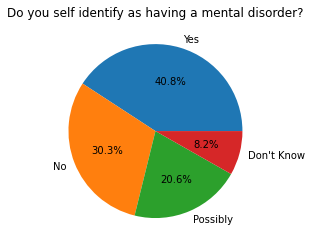

In [13]:
#plot pie chart of the reponses to survey quetion #15
fig = plt.figure()

tech_mental_health_yes.plot(kind ="pie", ylabel = "", title ="Do you self identify as having a mental disorder?",autopct="%1.1f%%") 

fig.savefig('Images/MDQ15.png')

In [14]:
#create data frame of the people that answered quesstion #15 as yes
MD_Yes_df = tech_mental_health.loc[tech_mental_health["15_CURRENT_MH_DISORDER"]=="Yes"]
MD_Yes_df

,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,8_ANONIMITY_PROTECT,9_COMFORT_DISCUSS_SUPERVISOR,...,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
2,2017,0,25-Jun,1,I don't know,No,I don't know,No,Yes,Yes,...,Yes,Sometimes,Sometimes,1.0,36.0,male,United States of America,Missouri,White,United States of America
3,2017,0,More than 1000,1,Yes,Yes,I don't know,I don't know,Yes,Yes,...,Yes,Sometimes,Often,2.0,22.0,Male,United States of America,Washington,White,United States of America
6,2017,0,44372,1,Yes,Yes,No,No,Yes,Yes,...,Yes,Rarely,Often,2.0,36.0,F,United States of America,Washington,Asian,United States of America
11,2017,0,100-500,1,I don't know,No,No,I don't know,I don't know,Maybe,...,Yes,Sometimes,Often,1.0,35.0,Male,United States of America,Tennessee,White,United States of America
13,2017,0,More than 1000,1,I don't know,No,No,I don't know,I don't know,Maybe,...,No,Sometimes,Often,3.0,22.0,Female,United States of America,Louisiana,White,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,2020,0,500-1000,1,I don't know,No,Yes,No,Yes,Yes,...,Yes,Rarely,Often,4.0,38.0,Male,Spain,NaN,NaN,Spain
1679,2020,0,26-100,1,Not eligible for coverage / NA,NaN,Yes,Yes,Yes,Yes,...,Yes,Sometimes,Often,2.0,42.0,Male,Spain,NaN,NaN,Spain
1693,2020,0,26-100,1,Yes,No,Yes,Yes,I don't know,Yes,...,Yes,Often,Often,2.0,39.0,Male,United States of America,Colorado,White,United States of America
1698,2020,0,26-100,1,Yes,Yes,Yes,Yes,No,No,...,Yes,Sometimes,Often,2.0,40.0,Female,United Kingdom,NaN,NaN,United Kingdom


In [15]:
#create data frame of responses during 2017
MD_Yes_copy_df = MD_Yes_df.copy()
MD_Yes_2017_df = MD_Yes_copy_df.loc[MD_Yes_copy_df["YEAR"]== 2017]
MD_Yes_2017_df

,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,8_ANONIMITY_PROTECT,9_COMFORT_DISCUSS_SUPERVISOR,...,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
2,2017,0,25-Jun,1,I don't know,No,I don't know,No,Yes,Yes,...,Yes,Sometimes,Sometimes,1.0,36.0,male,United States of America,Missouri,White,United States of America
3,2017,0,More than 1000,1,Yes,Yes,I don't know,I don't know,Yes,Yes,...,Yes,Sometimes,Often,2.0,22.0,Male,United States of America,Washington,White,United States of America
6,2017,0,44372,1,Yes,Yes,No,No,Yes,Yes,...,Yes,Rarely,Often,2.0,36.0,F,United States of America,Washington,Asian,United States of America
11,2017,0,100-500,1,I don't know,No,No,I don't know,I don't know,Maybe,...,Yes,Sometimes,Often,1.0,35.0,Male,United States of America,Tennessee,White,United States of America
13,2017,0,More than 1000,1,I don't know,No,No,I don't know,I don't know,Maybe,...,No,Sometimes,Often,3.0,22.0,Female,United States of America,Louisiana,White,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,2017,0,100-500,1,Yes,Yes,No,Yes,Yes,Yes,...,Yes,Rarely,Often,1.0,42.0,Female,United States of America,Missouri,White,United States of America
740,2017,0,500-1000,1,Yes,Yes,Yes,Yes,I don't know,No,...,Yes,Rarely,Often,3.0,41.0,Female,United States of America,Utah,White,United States of America
746,2017,0,26-100,1,Yes,No,No,I don't know,I don't know,Maybe,...,Yes,Sometimes,Often,3.0,57.0,F,United States of America,Maryland,White,United States of America
749,2017,0,26-100,1,Yes,Yes,No,No,Yes,Yes,...,Yes,Rarely,Often,4.0,29.0,Male,United States of America,Maryland,White,United States of America


In [16]:
#number of people responded to the survey during each year
MD_Yes_df['YEAR'].value_counts()

2017    204
2018    122
2019     86
2020     25
Name: YEAR, dtype: int64

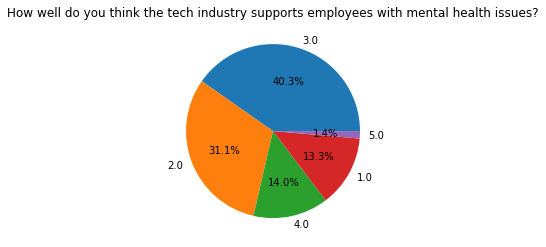

In [17]:
#plot pie chart of the the responses to Q#19 "Do you feel supported?"
#values range from 1 - 5
fig = plt.figure()

tech_mental_health_support = MD_Yes_df["19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER"].value_counts()
tech_mental_health_support.plot(kind ="pie", ylabel = "", title ="How well do you think the tech industry supports employees with mental health issues?",autopct="%1.1f%%") 

fig.savefig('Images/MDQ19.png')

In [18]:
#total number of reponses for each category of at an aggregate level
tech_mental_health_yes = tech_mental_health["19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER"].value_counts()
tech_mental_health_yes

3.0    429
2.0    333
4.0    152
1.0    139
5.0     18
Name: 19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER, dtype: int64

In [19]:
#total number of reponses for each category durinng 2017
print(len(MD_Yes_2017_df['19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER']))
mental_health_support_2017 = MD_Yes_2017_df["19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER"].value_counts()
mental_health_support_2017

204


3.0    85
2.0    63
1.0    29
4.0    25
5.0     2
Name: 19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER, dtype: int64

In [20]:
#create data frame of responses during 2018
#total number of reponses for each category durinng 2018

MD_Yes_copy_df = MD_Yes_df.copy()
MD_Yes_2018_df = MD_Yes_copy_df.loc[MD_Yes_copy_df["YEAR"]== 2018]
MD_Yes_2018_df
print(len(MD_Yes_2018_df['19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER']))
mental_health_support_2018 = MD_Yes_2018_df["19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER"].value_counts()
mental_health_support_2018

122


3.0    48
2.0    39
4.0    22
1.0    12
5.0     1
Name: 19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER, dtype: int64

In [21]:
MD_Yes_2018_df

,YEAR,1_SELF_EMPLOY,2_NUM_OF_EMPLOYEES,3_TECH_ORG,4_MH_BEN_PROVIDED,5_AWARE_OF_MH_BENEFITS,6_EMPLOY_FORMALLY_DISCUSS_MH,7_EMPLOY_OFFER_RESOURCES,8_ANONIMITY_PROTECT,9_COMFORT_DISCUSS_SUPERVISOR,...,16_DIAGNOSED_MH_DISORDER,17_DISORDER_INTERFERE_WITH_WORK_WHEN_TREATED,18_DISORDER_INTERFERE_WITH_WORK_WHEN_NOT_TREATED,19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER,20_AGE,21_GENDER,22_COUNTRY,23_STATE,24_RACE,25_COUNTRY_2
757,2018,0,More than 1000,1,Yes,Yes,No,I don't know,I don't know,No,...,Yes,Sometimes,Often,3.0,29.0,male,United States of America,Massachusetts,White,United States of America
760,2018,0,26-100,1,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Rarely,Sometimes,4.0,29.0,Ostensibly Male,United States of America,Tennessee,White,United States of America
762,2018,0,More than 1000,1,Yes,Yes,No,No,I don't know,No,...,Yes,Often,Often,2.0,29.0,Agender,Finland,NaN,NaN,Finland
763,2018,0,26-100,1,Not eligible for coverage / NA,NaN,No,No,I don't know,No,...,Yes,Sometimes,Often,4.0,35.0,male,Poland,NaN,NaN,Poland
766,2018,0,More than 1000,1,Yes,Yes,Yes,Yes,I don't know,Maybe,...,Yes,Rarely,Sometimes,2.0,45.0,Male,United States of America,Washington,White,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,2018,0,More than 1000,1,Yes,Yes,Yes,Yes,I don't know,Yes,...,Yes,Rarely,Often,3.0,29.0,Woman,United States of America,District of Columbia,NaN,United States of America
1152,2018,0,More than 1000,1,Yes,Yes,Yes,Yes,No,Maybe,...,Yes,Rarely,Sometimes,3.0,34.0,Female,Australia,NaN,NaN,Australia
1159,2018,0,100-500,1,I don't know,Yes,No,No,No,No,...,Yes,Often,Often,1.0,34.0,Male,United States of America,Kansas,White,United States of America
1160,2018,0,26-100,1,Yes,Yes,Yes,No,I don't know,Maybe,...,Yes,Sometimes,Often,2.0,24.0,gender non-conforming woman,United States of America,New Jersey,White,United States of America


In [22]:
#create data frame of responses during 2019
#print number of responses in 2019
#total number of reponses for each category durinng 2019
MD_Yes_copy_df = MD_Yes_df.copy()
MD_Yes_2019_df = MD_Yes_copy_df.loc[MD_Yes_copy_df["YEAR"]== 2019]
MD_Yes_2019_df
print(len(MD_Yes_2019_df['19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER']))
mental_health_support_2019 = MD_Yes_2019_df["19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER"].value_counts()
mental_health_support_2019

86


3.0    34
2.0    26
1.0    13
4.0    11
5.0     2
Name: 19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER, dtype: int64

In [23]:
#create data frame of responses during 2020
#print number of responses in 2020
#total number of reponses for each category durinng 2020
MD_Yes_copy_df = MD_Yes_df.copy()
MD_Yes_2020_df = MD_Yes_copy_df.loc[MD_Yes_copy_df["YEAR"]== 2020]
MD_Yes_2020_df
print(len(MD_Yes_2020_df['19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER']))
mental_health_support_2020 = MD_Yes_2020_df["19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER"].value_counts()
mental_health_support_2020

25


3.0    9
2.0    8
1.0    4
4.0    3
5.0    1
Name: 19_TECH_SUPPORT_EMPLOYEE_w_MH_DISORDER, dtype: int64

In [24]:
#create data frame of the value counts of Q#19 reponses
Q19_dict = {'2017': mental_health_support_2017,'2018': mental_health_support_2018, 
            '2019': mental_health_support_2019,'2020': mental_health_support_2020}
Q19_df = pd.DataFrame(Q19_dict)
Q19_df

,2017,2018,2019,2020
1.0,29,12,13,4
2.0,63,39,26,8
3.0,85,48,34,9
4.0,25,22,11,3
5.0,2,1,2,1


<Figure size 432x288 with 0 Axes>

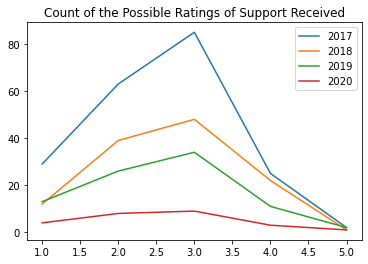

In [26]:
#plot count of each response type broken out by year
fig = plt.figure()

Q19_df.plot.line()
plt.title("Count of the Possible Ratings of Support Received")

fig.savefig('Images/Q19valuecount.png')

In [27]:
#switch columns and rows
Q19_df_transposed = Q19_df.T # or df1.transpose()
Q19_df_transposed

#Total the reposnses received to Q19 and add to it's own column
sum_column = Q19_df_transposed[1.0] + Q19_df_transposed[2.0]+ Q19_df_transposed[3.0]+ Q19_df_transposed[4.0]+ Q19_df_transposed[5.0]
Q19_df_transposed["Total_Responses"] = sum_column
Q19_df_transposed

#determine the percent of each rating and add them to a column
PCT_1 = (Q19_df_transposed[1.0]/Q19_df_transposed["Total_Responses"])*100
Q19_df_transposed["1"] = PCT_1

PCT_2 = (Q19_df_transposed[2.0]/Q19_df_transposed["Total_Responses"])*100
Q19_df_transposed["2"] = PCT_2

PCT_3 = (Q19_df_transposed[3.0]/Q19_df_transposed["Total_Responses"])*100
Q19_df_transposed["3"] = PCT_3

PCT_4 = (Q19_df_transposed[4.0]/Q19_df_transposed["Total_Responses"])*100
Q19_df_transposed["4"] = PCT_4

PCT_5 = (Q19_df_transposed[5.0]/Q19_df_transposed["Total_Responses"])*100
Q19_df_transposed["5"] = PCT_5


Q19_df_transposed

,1.0,2.0,3.0,4.0,5.0,Total_Responses,1,2,3,4,5
2017,29,63,85,25,2,204,14.215686,30.882353,41.666667,12.254902,0.980392
2018,12,39,48,22,1,122,9.836066,31.967213,39.344262,18.032787,0.819672
2019,13,26,34,11,2,86,15.116279,30.232558,39.534884,12.790698,2.325581
2020,4,8,9,3,1,25,16.000000,32.000000,36.000000,12.000000,4.000000


In [28]:
#drop columns uneeded for plot
PCT_Responses_19 = Q19_df_transposed.drop([1.0, 2.0,3.0,4.0,5.0,'Total_Responses'], axis=1)
PCT_Responses_19

#switch columns and rows for plot
PCT_Responses_19_tran = PCT_Responses_19.T # or df1.transpose()
PCT_Responses_19_tran

,2017,2018,2019,2020
1,14.215686,9.836066,15.116279,16.0
2,30.882353,31.967213,30.232558,32.0
3,41.666667,39.344262,39.534884,36.0
4,12.254902,18.032787,12.790698,12.0
5,0.980392,0.819672,2.325581,4.0


<Figure size 432x288 with 0 Axes>

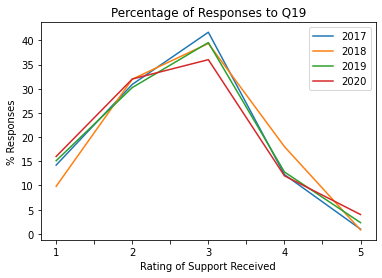

In [31]:
#plot the spread of the responses to Q19
fig = plt.figure()

PCT_Responses_19_tran.plot.line()
plt.title("Percentage of Responses to Q19")
plt.ylabel("% Responses")
plt.xlabel("Rating of Support Received")

fig.savefig('Images/Q19valuecount.png')

In [30]:
#3. Do those that have mental disorders in tech (15) feel as though they are supported in the tech industry (19)? 
#Plot pie chart "Percentage of Individuals with mental health disorders that feel supported". No need to bin because range 1-5


In [ ]:
#Do those that have mental disorders in tech (15) feel as though they are supported in the tech industry (19)? 
#Regression TBD


In [ ]:
# #2. Level of comfort people have discussing mental health with employers vs how many people have actually discussed mental health with employers?


# IMPORTANCE_EMPLOY_PHYS_HEALTH= survey_data_df["11_IMPORTANCE_EMPLOY_PHYS_HEALTH"].value_counts()
# IMPORTANCE_EMPLOY_PHYS_HEALTH

# # year_2017_health_type = survey_data_df["Year"] =="2017"
# # result_2017= survey_df.loc[year_2017_health_type]
# # mouse_y793= capomulin_table.loc[capomulin_table["Mouse ID"]=="y793"]
# # plt.plot(mousedata["Timepoint"], mousedata["Tumor Volume (mm3)"])
# # plt.xlabel("Timepoint (days)")
# # plt.ylabel("Tumor Volume (mm3)")
# # plt.title("Capomulin treatment of mouse y793")
# # plt.show()year_2017_health_type